In [128]:
from sklearn.decomposition import PCA
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import math as m

from random import seed
from random import random
from random import gauss

from scipy import signal

import matplotlib as mpl
import matplotlib.pyplot as plt

In [210]:
def Square_signal(x, n=1., p=0.1):
    # Amplitude: a
    # Phase : p
    # Frequency
    # Noise
    N = 2.*n - 1.
    a = 100./(m.pi*N)
    y = a* m.sin(N* m.pi* x + p)
    
    return(y)

Square_signal_vect = np.vectorize(Square_signal)

In [191]:
x = np.array(( np.linspace(0, 1, 53)))

for i in range(0,15000):
    x = np.vstack([x, np.linspace(0, 1, 53)])

In [192]:
sgn_1 = Square_signal_vect(x[0], n=1., p=0.1)

for i in range(1, len(x)):
    s1 = sgn_1[i-1] + Square_signal_vect(x[i], n=i+1, p=0.1+0.1*random(), c=5.*gauss(0,1))
    sgn_1 = np.vstack([sgn_1, s1])

In [193]:
sig_1 = xr.DataArray(sgn_1, dims=['amplitude', 'weeks'], name='square').to_dataset()

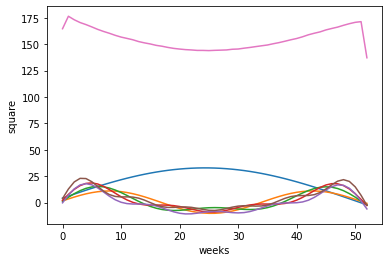

In [194]:
sig_1.square[0].plot()
sig_1.square[1].plot()
sig_1.square[2].plot()
sig_1.square[3].plot()
sig_1.square[4].plot()
sig_1.square[5].plot()
sig_1.square[500].plot()


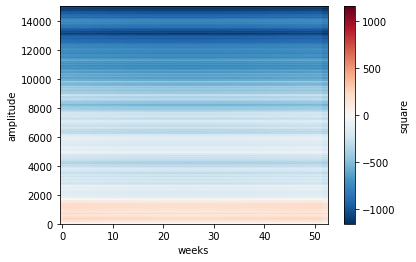

In [195]:
sig_1.square.plot()

## Statring PCA/EOF analysis

### Signal 1: Default sinusoidal, just noise

In [196]:
# Run the PCA analysis:
n_components = 15  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_1.square)

PCA(n_components=15)

In [197]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[9.99999052e-01 6.50594238e-07 2.19328584e-07 3.94622718e-08
 1.45516005e-08 7.35444475e-09 4.40834294e-09 2.89047967e-09
 2.00836897e-09 1.45426629e-09 1.08686049e-09 8.33001939e-10
 6.52141968e-10 5.19897896e-10 4.20480493e-10]

Singular values:
[3.05853198e+05 2.46699539e+02 1.43238858e+02 6.07581124e+01
 3.68950933e+01 2.62293891e+01 2.03072407e+01 1.64436487e+01
 1.37067655e+01 1.16636693e+01 1.00832406e+01 8.82746974e+00
 7.81059836e+00 6.97384453e+00 6.27171273e+00]


In [198]:
reduced_values = pca.transform(sig_1.square)

In [199]:
print(pca.components_.size)
print(795/53)

795
15.0


In [200]:
# Put all components_ analysis data to the dataset
sig_1['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_1['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_1['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

In [201]:
sig_1

<xarray.Dataset>
Dimensions:             (amplitude: 15001, n_eof: 15, sample: 15001, week: 53, weeks: 53)
Dimensions without coordinates: amplitude, n_eof, sample, week, weeks
Data variables:
    square              (amplitude, weeks) float64 4.178 6.084 ... -1.062e+03
    reduced_data        (sample, n_eof) float64 -3.059e+03 34.36 ... 0.0008755
    eigen_values        (n_eof, week) float64 -0.1366 -0.1374 ... -0.0001365
    explained_variance  (n_eof) float64 100.0 6.506e-05 ... 5.199e-08 4.205e-08

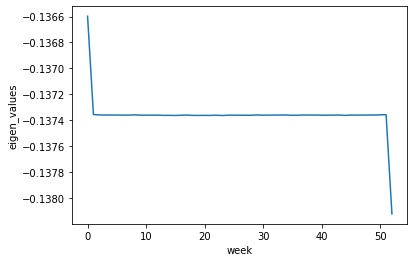

In [202]:
sig_1['eigen_values'][0].plot(hue='n_eof')
plt.show()

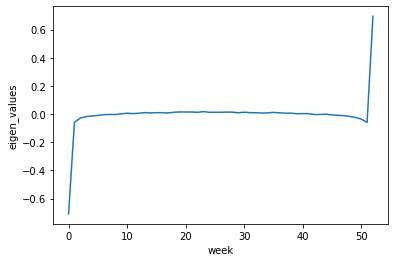

In [203]:
sig_1['eigen_values'][1].plot(hue='n_eof')
plt.show()

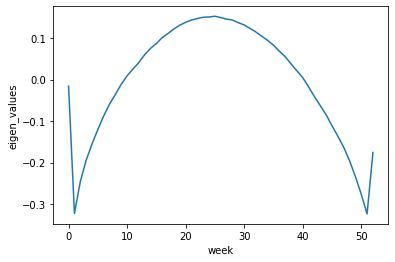

In [204]:
sig_1['eigen_values'][2].plot(hue='n_eof')
plt.show()

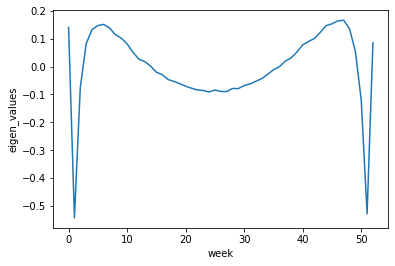

In [205]:
sig_1['eigen_values'][3].plot(hue='n_eof')
plt.show()

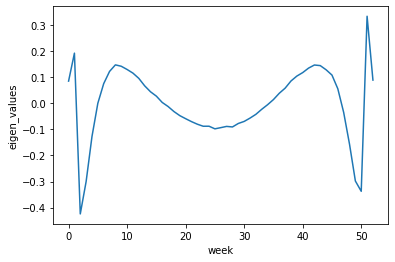

In [206]:
sig_1['eigen_values'][4].plot(hue='n_eof')
plt.show()

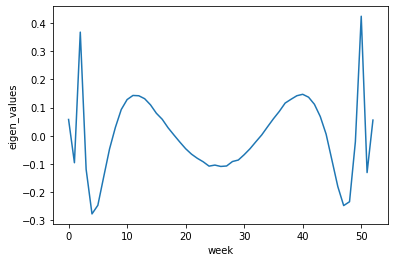

In [207]:
sig_1['eigen_values'][5].plot(hue='n_eof')
plt.show()

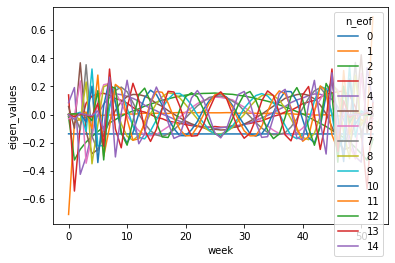

In [208]:
sig_1['eigen_values'].plot(hue='n_eof')
plt.show()

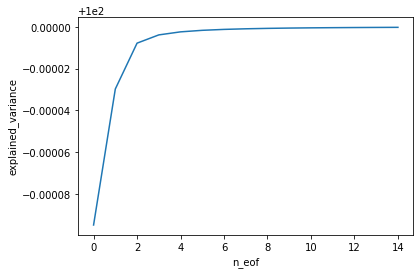

In [209]:
sig_1['explained_variance'].cumsum(dim='n_eof').plot()

In [211]:
729*75*105

5740875